In [1]:
# Initialization

import math
from datetime import datetime
import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model as ty
import proc as pr
import matplotlib.ticker as mtick
import sklearn.metrics

from IPython.core.display import HTML

import heat_transfer as bht

import fluids as fds
import ht 

import general as gen

import os

import scipy.integrate as integrate
import scipy.optimize as sco

import networkx as nx

import plotly.graph_objects as go

import plot_functions_here as pfun

import sys
sys.path.insert(0,r'C:\Users\valen\Dropbox (DualSun)\PC\Documents\GitHub\RD-systems-and-test-benches')
import SK_standard as sk

In [5]:
input_name = r'\Inputs_SPRING425-I.xlsx'
hyp_name = '\Model_hypotheses.xlsx'
data = r'\221122_TUV_test_conditions_S425-I_MPP.xlsx'

output_name = 'S425_I_MPP'

par = pr.import_input(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Inputs',input_name)
hyp = pr.create_dict_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Hypotheses',hyp_name,'Main')
condi = pr.create_inputs_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Steady-state conditions inputs'+data,par,hyp)

{'exchanger': {'name': 'SPRING425-NI', 'eta_nom': 0.201, 'Eff_T': -0.0034000000000000002, 'T_ref': 298.15, 'Eff_G': 0, 'G_ref': 1000, 'X_corr': 1, 'tau_alpha': 0.85, 'eps': 0.95, 'eps_bs': 0.9, 'w_pan': 1.095, 'L_pan': 1.9, 'orientation': 'portrait', 'lambd_upper_glass': 0.00278, 'lambd_upper_EVA': 0.000515, 'lambd_si': 0.00015, 'lambd_lower_EVA': 0.000515, 'lambd_PVDF': 3e-05, 'lambd_PET': 0.00027, 'lambd_adh': 0.0, 'lambd_lower_glass': 0.0, 'k_glass': 0.8, 'k_EVA': 0.24, 'k_si': 60, 'k_PVDF': 0.2, 'k_PET': 0.3, 'k_adh': 0.2, 'L_abs': 1.5, 'w_abs': 1.03, 'geometry': 'harp', 'N_harp': 184, 'N_meander': 1, 'L_tube': 1.43, 'tube_geometry': 'rectangular', 'H_tube': 0.0040999999999999995, 'w_tube': 0.0048, 'l_c': 0.0054, 'W': 0.0055, 'p_ext_tube': 0.0055, 'p_ext_tube_rad': 0.0, 'lambd_air': 0.0, 'lambd_conductive_plate': 0.0, 'lambd_abs': 0.00095, 'lambd_riser_plate': 9.999999999999999e-10, 'lambd_riser_back': 0.00095, 'lambd_ins': 0.012, 'eps_he': 0.9, 'eps_ins': 0.8, 'k_air': 0.025, 'k_c

In [6]:
df_res,X,list_res,list_df,list_df_historic = ty.simu_condi(par,hyp,condi)

back_h_simple DT>0 Ra_L 34.56379846683673
back_h_simple DT>0 Ra_L 34.75091736935562
back_h_simple DT>0 Ra_L 34.75077151649615
back_h_simple DT>0 Ra_L 34.750771662475714
back_h_simple DT>0 Ra_L 34.75077166234697
back_h_simple DT>0 Ra_L 34.75077166234489
back_h_simple DT>0 Ra_L 34.75077166234664
back_h_simple DT>0 Ra_L 34.75077166234574
back_h_simple DT>0 Ra_L 34.75077166234574
back_h_simple DT>0 Ra_L 34.75077166234574
back_h_simple DT>0 Ra_L 40.70062357365512
back_h_simple DT>0 Ra_L 40.52210530740963
back_h_simple DT>0 Ra_L 40.52282606604814
back_h_simple DT>0 Ra_L 40.52282309359506
back_h_simple DT>0 Ra_L 40.522823105862194
back_h_simple DT>0 Ra_L 40.52282310582298
back_h_simple DT>0 Ra_L 40.522823105823605
back_h_simple DT>0 Ra_L 40.522823105823605
back_h_simple DT>0 Ra_L 40.52282310582319
back_h_simple DT>0 Ra_L 40.522823105823605
back_h_simple DT>0 Ra_L 34.541520177353966
back_h_simple DT>0 Ra_L 34.72893117041551
back_h_simple DT>0 Ra_L 34.72878545266975
back_h_simple DT>0 Ra_L 34.7

In [7]:
[tab,X] = sk.find_SK_SST(condi,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TÜV'])

[tab_m,X_m] = sk.find_SK_SST(df_res,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df['Linear fit model 1D'] = X_m[0]

pr.disp_html(X_df)

,TÜV,Linear fit model 1D
"eta0,hem",0.371851,0.389543
a1,13.015445,12.154449
a2,0.000000,0.000000
a3,0.972661,0.694995
a4,0.000000,0.000000
a5,0.000000,0.000000
a6,0.012057,0.011183
a7,0.000000,0.000000
a8,0.000000,0.000000


In [8]:
13.015445-1.7*0.972661

11.361921299999999

In [9]:
12.154449-1.7*0.694995

10.9729575

In [35]:
# Parametric emissivity 
ins_list = [0.01,0.02,0.03,0.04,0.05]

param_res = {}

for i in range(len(ins_list)):
    for key,value in par.items():
        if key == "anomaly1":
            value["lambd_ins"] = ins_list[i]/2
            pr.insulated(value)
            pr.R_2(value)
        elif key=="manifold":
            pass
        elif key != "AG":
            value["lambd_ins"] = ins_list[i]
            pr.insulated(value)
            pr.R_2(value)
        else:
            pass


    df_res,X,list_res,list_df,list_df_historic = ty.simu_condi(par,hyp,condi)
    param_res[ins_list[i]] = {'df_res':df_res,'X':X,'list_res':list_res,'list_df':list_df,'list_df_historic':list_df_historic}

back_h_simple DT>0 Ra_L 33.365418310087605
back_h_simple DT>0 Ra_L 33.59376054928787
back_h_simple DT>0 Ra_L 33.593719465456715
back_h_simple DT>0 Ra_L 33.59371947844149
back_h_simple DT>0 Ra_L 33.59371947842224
back_h_simple DT>0 Ra_L 33.59371947842178
back_h_simple DT>0 Ra_L 33.5937194784231
back_h_simple DT>0 Ra_L 33.59371947842178
back_h_simple DT>0 Ra_L 33.5937194784231
back_h_simple DT>0 Ra_L 33.59371947842178
back_h_simple DT>0 Ra_L 39.335808016253594
back_h_simple DT>0 Ra_L 39.22054874938798
back_h_simple DT>0 Ra_L 39.22090367472536
back_h_simple DT>0 Ra_L 39.22090254728112
back_h_simple DT>0 Ra_L 39.220902550867834
back_h_simple DT>0 Ra_L 39.22090255086816
back_h_simple DT>0 Ra_L 39.220902550867834
back_h_simple DT>0 Ra_L 39.22090255086816
back_h_simple DT>0 Ra_L 39.220902550867834
back_h_simple DT>0 Ra_L 39.22090255086816
back_h_simple DT>0 Ra_L 33.16299557069557
back_h_simple DT>0 Ra_L 33.39954742904694
back_h_simple DT>0 Ra_L 33.39951888168548
back_h_simple DT>0 Ra_L 33.399

In [36]:
reg_select = [1,1,0,1,0,0,1,0,0]

[tab,X] = sk.find_SK_SST(condi,par['AG'],columns_list=reg_select)
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TUV'])

for i in range(len(ins_list)):
    [tab_m,X_m] = sk.find_SK_SST(param_res[ins_list[i]]['df_res'],par['AG'],columns_list=reg_select)
    X_df['Linear fit model 1D - eps = '+str(ins_list[i])] = X_m[0]

pr.disp_html(X_df)

,TUV,Linear fit model 1D - eps = 0.01,Linear fit model 1D - eps = 0.02,Linear fit model 1D - eps = 0.03,Linear fit model 1D - eps = 0.04,Linear fit model 1D - eps = 0.05
"eta0,hem",0.381692,0.387554,0.387969,0.388188,0.388322,0.388413
a1,16.639061,12.162645,11.758734,11.556284,11.434254,11.352560
a2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a3,0.835146,0.881270,0.881177,0.881377,0.881560,0.881705
a4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a6,0.012849,0.012096,0.012117,0.012125,0.012129,0.012132
a7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
a8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
ins_list = [0.] + ins_list

In [38]:
X_df.loc['A1'] = X_df.loc['a1'] + (-1.7)*X_df.loc['a3']

In [39]:
X_df_save3 = X_df.copy()

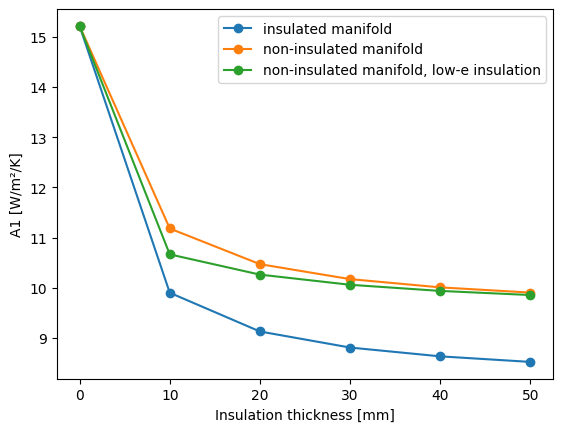

In [40]:
plt.plot(1000*np.array(ins_list),X_df_save2.loc['A1'],'o-',label='insulated manifold')
plt.plot(1000*np.array(ins_list),X_df_save.loc['A1'],'o-',label="non-insulated manifold")
plt.plot(1000*np.array(ins_list),X_df_save3.loc['A1'],'o-',label="non-insulated manifold, low-e insulation")
plt.xlabel('Insulation thickness [mm]')
plt.ylabel('A1 [W/m²/K]')
plt.legend()
plt.show()

In [ ]:
# X_df.to_csv(output_name+'.csv',sep=";")

In [ ]:
pr.disp_html(df_res)

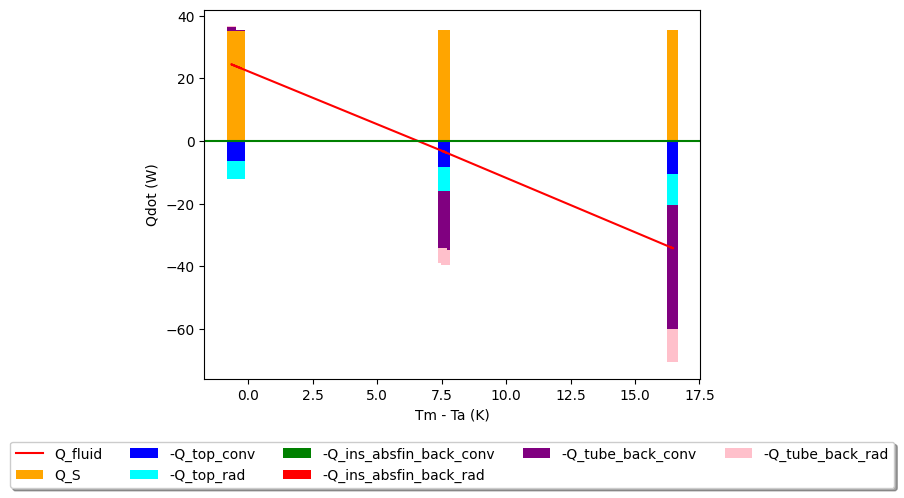

In [53]:
u_list = df_res['u'].unique()

# powers = ["Q_S","Q_top_conv","Q_top_rad","Q_tube_back_conv","Q_tube_back_rad","Q_f01"]
df_res["-Q_top_conv"] = -df_res["Q_top_conv"]
df_res["-Q_top_rad"] = -df_res["Q_top_rad"]
df_res["-Q_ins_absfin_back_conv"] = -df_res["Q_ins_absfin_back_conv"]
df_res["-Q_ins_absfin_back_rad"] = -df_res["Q_ins_absfin_back_rad"]
df_res["-Q_tube_back_conv"] = -df_res["Q_tube_back_conv"]
df_res["-Q_tube_back_rad"] = -df_res["Q_tube_back_rad"]
# df_res["-Q_f01"] = -df_res["Q_f01"]

df_select_u = df_res.loc[df_res["u"]==u_list[1]]

powers = ["Q_S","-Q_top_conv","-Q_top_rad","-Q_ins_absfin_back_conv","-Q_ins_absfin_back_rad","-Q_tube_back_conv","-Q_tube_back_rad"]

df_hist = df_select_u

dict_pos = {}
dict_neg = {}
dict_pos_agg = {}
dict_neg_agg = {}

DT_list = []
for DT in df_hist["-(T_m - T_a)"]:
    DT_list.append(-DT)

# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_tube_back"]
# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_fluid_back","-Q_f01"]


for i in range(len(powers)):
    str = powers[i]
    
    dict_pos[str] = np.array(ty.pos_df(df_hist,str))
    dict_neg[str] = np.array(ty.neg_df(df_hist,str))

    if i==0:
        dict_pos_agg[str] = 0*np.array(ty.pos_df(df_hist,str))
        dict_neg_agg[str] = dict_pos_agg[str]

    else:
        dict_pos_agg[str] = dict_pos_agg[powers[i-1]] + dict_pos[powers[i-1]]
        dict_neg_agg[str] = dict_neg_agg[powers[i-1]] + dict_neg[powers[i-1]]

fig, ax = plt.subplots()

width = 0.35

# labels_list = ['Sun','Front convection','Front radiation','Back convection and radiation']
labels_list = powers
colors_list = ['orange','blue','cyan','green','red','purple','pink']

for i,str in enumerate(powers):
    ax.bar(DT_list, dict_pos[str], width, bottom=dict_pos_agg[str], label=labels_list[i], color=colors_list[i])
    ax.bar(DT_list, dict_neg[str], width, bottom=dict_neg_agg[str], color=colors_list[i])

ax.plot(DT_list,df_hist["Q_tube_fluid"],color="red",label="Q_fluid")
# ax.plot(labels,np.array(N_disp*[list_PL[q]]))

# ax.set_ylabel('PL (Pa)')
# ax.set_title('SPRING')
ax.set_xlabel("Tm - Ta (K)")
ax.set_ylabel("Qdot (W)")
ax.axhline(y = 0., color = 'g', linestyle = '-')
  
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [10]:
u_list = df_res['u'].unique()
color_list = ['blue','red','green','orange','cyan','purple']

popt_mod_list,pcov_mod_list = pr.linear_interpolation_df(u_list,df_res)
popt_tuv_list,pcov_tuv_list = pr.linear_interpolation_condi(u_list,condi)

fig = pfun.plot_model_tuv(u_list,df_res,condi,popt_mod_list,popt_tuv_list,color_list)

In [11]:
fig = fig.update_layout(
    title={
        'text': "S425-NI SK",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [16]:
rmse = math.sqrt(np.mean((df_res["Qdot / AG"]-condi["Qdot / AG"])**2))

In [17]:
rmse

19.94239898565618

In [18]:
rmse/condi["Qdot / AG"].mean()

0.06654774372193258

In [ ]:
color_list = ['blue','red','green','orange','cyan','purple']

def lin(x,a,b):
    return a*x+b

popt_mod_list = []
pcov_mod_list = []
popt_tuv_list = []
pcov_tuv_list = []


for i in range(len(u_list)):
    popt,pcov = sco.curve_fit(lin,-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'])
    popt_mod_list.append(popt)
    pcov_mod_list.append(pcov)

    popt,pcov = sco.curve_fit(lin,condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],condi.loc[df_res["u"]==u_list[i]]['Qdot / AG'])
    popt_tuv_list.append(popt)
    pcov_tuv_list.append(pcov)

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
fig.write_html(output_name+'.html')

In [ ]:
condi

In [ ]:
pr.disp_html(df_res)

In [ ]:
u_list = [0.7,2.1,3.7]
# u_list = [0.3]

color_list = ['blue','red','green','orange','cyan','purple']

def lin(x,a,b):
    return a*x+b

popt_mod_list = []
pcov_mod_list = []
popt_tuv_list = []
pcov_tuv_list = []


for i in range(len(u_list)):
    popt,pcov = sco.curve_fit(lin,-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'])
    popt_mod_list.append(popt)
    pcov_mod_list.append(pcov)

    popt,pcov = sco.curve_fit(lin,condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],condi.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'])
    popt_tuv_list.append(popt)
    pcov_tuv_list.append(pcov)

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "SOLIMPEKS",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Q_dot / A_G'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "SOLIMPEKS",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
fig.write_html('solimpeks.html')

In [ ]:
popt

In [ ]:
mse = sklearn.metrics.mean_squared_error(df_res['Q_dot / A_G'],condi['Q_dot / A_G'])
print(math.sqrt(mse))